**Load The Dataset**

In [32]:
#loading data through pandas 
import pandas as pd
all_data_matrix = pd.read_csv("TimeBasedFeatures-10s-Layer2 (1).csv")
all_data_matrix

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,57188,82.161.239.177,110,6,7248168,2.112603e+04,29.110804,34515.085714,2.738693e+05,3897923,5,89483.555556,4.371676e+05,3898126,29,5.661404e+04,3.498551e+05,3898131,7,0,0,0,0,0,0,0,0,AUDIO
1,10.0.2.15,57188,82.161.239.177,110,6,5157723,1.052790e+03,3.683796,286540.166667,8.788385e+05,3743359,135,644715.375000,1.272066e+06,3743562,509,5.689017e+05,1.209110e+06,3743573,451,0,0,0,0,0,0,0,0,AUDIO
2,10.0.2.15,57188,82.161.239.177,110,6,41,1.324390e+07,48780.487805,41.000000,0.000000e+00,41,41,41.000000,0.000000e+00,41,41,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,AUDIO
3,10.0.2.15,57188,82.161.239.177,110,6,9543565,6.373855e+04,83.930900,11929.456250,9.007219e+04,2007954,5,31705.295681,1.455802e+05,2007978,28,1.916324e+04,1.141093e+05,2008877,5,0,0,0,0,0,0,0,0,AUDIO
4,10.0.2.15,57188,82.161.239.177,110,6,9987537,1.996166e+05,245.806348,4069.900978,2.036573e+04,608241,5,11743.344706,3.400857e+04,608450,31,6.230089e+03,2.533212e+04,608241,5,0,0,0,0,0,0,0,0,AUDIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8039,82.161.239.177,110,10.0.2.15,47257,6,7413083,2.991468e+03,8.633385,117667.984127,6.261953e+05,4956581,11,218030.470588,8.459590e+05,4957249,170,2.647072e+05,9.284703e+05,4956793,217,0,0,0,0,0,0,0,0,CHAT
8040,82.161.239.177,110,10.0.2.15,47257,6,9807892,6.089994e+02,2.039174,516204.842105,1.971833e+06,8646908,45,980789.200000,2.697052e+06,8647321,1420,1.225950e+06,3.001269e+06,8647148,1134,1420,0,1420,1420,8646908,0,8646908,8646908,CHAT
8041,82.161.239.177,110,10.0.2.15,47257,6,9979796,9.793787e+02,3.306681,311868.625000,1.289556e+06,7341693,8,587046.823529,1.757638e+06,7380494,635,7.124705e+05,1.913959e+06,7341693,371,2241210,0,2241210,2241210,7341693,0,7341693,7341693,CHAT
8042,82.161.239.177,110,10.0.2.15,47257,6,1327,8.183873e+05,2260.738508,663.500000,5.861915e+02,1078,249,1327.000000,0.000000e+00,1327,1327,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,CHAT


In [33]:
all_data_matrix.info

<bound method DataFrame.info of            Source IP   Source Port  Destination IP  ...   Idle Max   Idle Min  label
0          10.0.2.15         57188  82.161.239.177  ...          0          0  AUDIO
1          10.0.2.15         57188  82.161.239.177  ...          0          0  AUDIO
2          10.0.2.15         57188  82.161.239.177  ...          0          0  AUDIO
3          10.0.2.15         57188  82.161.239.177  ...          0          0  AUDIO
4          10.0.2.15         57188  82.161.239.177  ...          0          0  AUDIO
...              ...           ...             ...  ...        ...        ...    ...
8039  82.161.239.177           110       10.0.2.15  ...          0          0   CHAT
8040  82.161.239.177           110       10.0.2.15  ...    8646908    8646908   CHAT
8041  82.161.239.177           110       10.0.2.15  ...    7341693    7341693   CHAT
8042  82.161.239.177           110       10.0.2.15  ...          0          0   CHAT
8043  82.161.239.177           11

In [34]:
all_data_matrix.head(5)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,57188,82.161.239.177,110,6,7248168,2.112603e+04,29.110804,34515.085714,273869.262513,3897923,5,89483.555556,4.371676e+05,3898126,29,56614.039062,3.498551e+05,3898131,7,0,0,0,0,0,0,0,0,AUDIO
1,10.0.2.15,57188,82.161.239.177,110,6,5157723,1.052790e+03,3.683796,286540.166667,878838.525555,3743359,135,644715.375000,1.272066e+06,3743562,509,568901.666667,1.209110e+06,3743573,451,0,0,0,0,0,0,0,0,AUDIO
2,10.0.2.15,57188,82.161.239.177,110,6,41,1.324390e+07,48780.487805,41.000000,0.000000,41,41,41.000000,0.000000e+00,41,41,0.000000,0.000000e+00,0,0,0,0,0,0,0,0,0,0,AUDIO
3,10.0.2.15,57188,82.161.239.177,110,6,9543565,6.373855e+04,83.930900,11929.456250,90072.192523,2007954,5,31705.295681,1.455802e+05,2007978,28,19163.236948,1.141093e+05,2008877,5,0,0,0,0,0,0,0,0,AUDIO
4,10.0.2.15,57188,82.161.239.177,110,6,9987537,1.996166e+05,245.806348,4069.900978,20365.733229,608241,5,11743.344706,3.400857e+04,608450,31,6230.089208,2.533212e+04,608241,5,0,0,0,0,0,0,0,0,AUDIO


In [35]:
all_data_matrix['label'].unique()

array(['AUDIO', 'BROWSING', 'CHAT', 'FILE-TRANSFER', 'MAIL', 'P2P',
       'VIDEO', 'VOIP'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


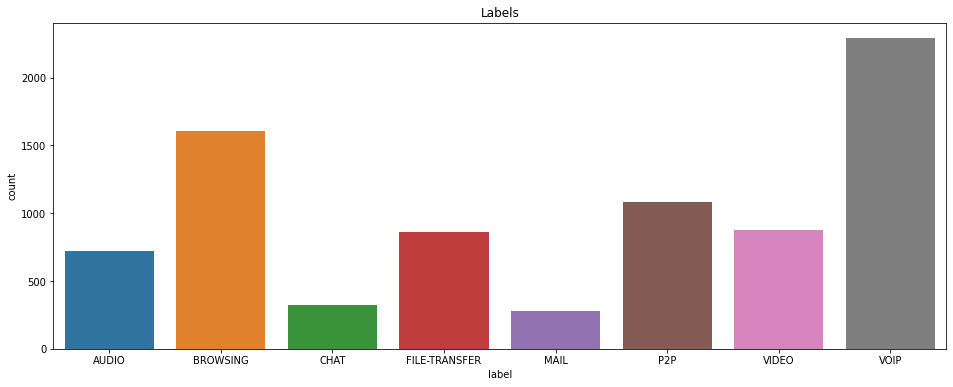

In [36]:
#unique values of labels
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.title('Labels')
ax = sns.countplot(all_data_matrix['label'],label="Count") 
      # M = 212, B = 357

In [37]:
all_data_matrix.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,8044.000000,8044.000000,8044.0,8.044000e+03,8.044000e+03,8044.000000,8.044000e+03,8.044000e+03,8.044000e+03,8044.000000,8.044000e+03,8.044000e+03,8.044000e+03,8.044000e+03,8.044000e+03,8.044000e+03,8.044000e+03,8.044000e+03,8.044000e+03,8044.0,8.044000e+03,8.044000e+03,8.044000e+03,8044.0,8.044000e+03,8.044000e+03
mean,30505.505719,16767.761313,6.0,8.412146e+06,2.707062e+05,706.836422,1.017038e+05,2.436356e+05,1.214898e+06,65.375062,2.169463e+05,3.065889e+05,1.219479e+06,4.146834e+04,1.990410e+05,2.509772e+05,1.139737e+06,5.648311e+04,4.885837e+04,0.0,4.885837e+04,4.885837e+04,5.060547e+05,0.0,5.060547e+05,5.060547e+05
std,22904.243121,22545.613741,0.0,3.062480e+06,1.420024e+06,4391.154798,3.139844e+05,6.377622e+05,2.026831e+06,1766.055329,6.919575e+05,7.945810e+05,2.025636e+06,4.780323e+05,6.758054e+05,6.599424e+05,1.918480e+06,5.355551e+05,3.198387e+05,0.0,3.198387e+05,3.198387e+05,1.884005e+06,0.0,1.884005e+06,1.884005e+06
min,110.000000,110.000000,6.0,2.200000e+01,0.000000e+00,0.400114,2.200000e+01,0.000000e+00,2.200000e+01,-2255.000000,0.000000e+00,0.000000e+00,0.000000e+00,-3.160000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-3.270000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,443.000000,443.000000,6.0,8.906492e+06,1.420822e+04,30.586932,4.444811e+03,1.386636e+04,9.602900e+04,0.000000,1.010068e+04,1.548966e+04,1.012988e+05,3.000000e+00,9.333091e+03,1.653038e+04,1.004742e+05,3.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,38894.000000,443.000000,6.0,9.965426e+06,2.958675e+04,77.540582,1.291837e+04,2.271775e+04,2.264350e+05,8.000000,2.856468e+04,2.708133e+04,2.350620e+05,2.800000e+01,2.641238e+04,2.475539e+04,2.169705e+05,2.300000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,51024.000000,41994.000000,6.0,9.989334e+06,1.687313e+05,225.119918,3.518860e+04,1.512991e+05,1.362727e+06,19.000000,8.147029e+04,1.863918e+05,1.368436e+06,9.800000e+01,5.052523e+04,1.366404e+05,1.223241e+06,1.890000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
max,60740.000000,59708.000000,6.0,1.000000e+07,2.710256e+07,90909.090909,3.332380e+06,5.771646e+06,9.996903e+06,127791.000000,9.997140e+06,7.054169e+06,9.997140e+06,9.997140e+06,9.996903e+06,7.053719e+06,9.996903e+06,9.996903e+06,4.823748e+06,0.0,4.823748e+06,4.823748e+06,9.996903e+06,0.0,9.996903e+06,9.996903e+06


In [38]:
all_data_matrix.columns

Index(['Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean',
       ' Idle Std', ' Idle Max', ' Idle Min', 'label'],
      dtype='object')

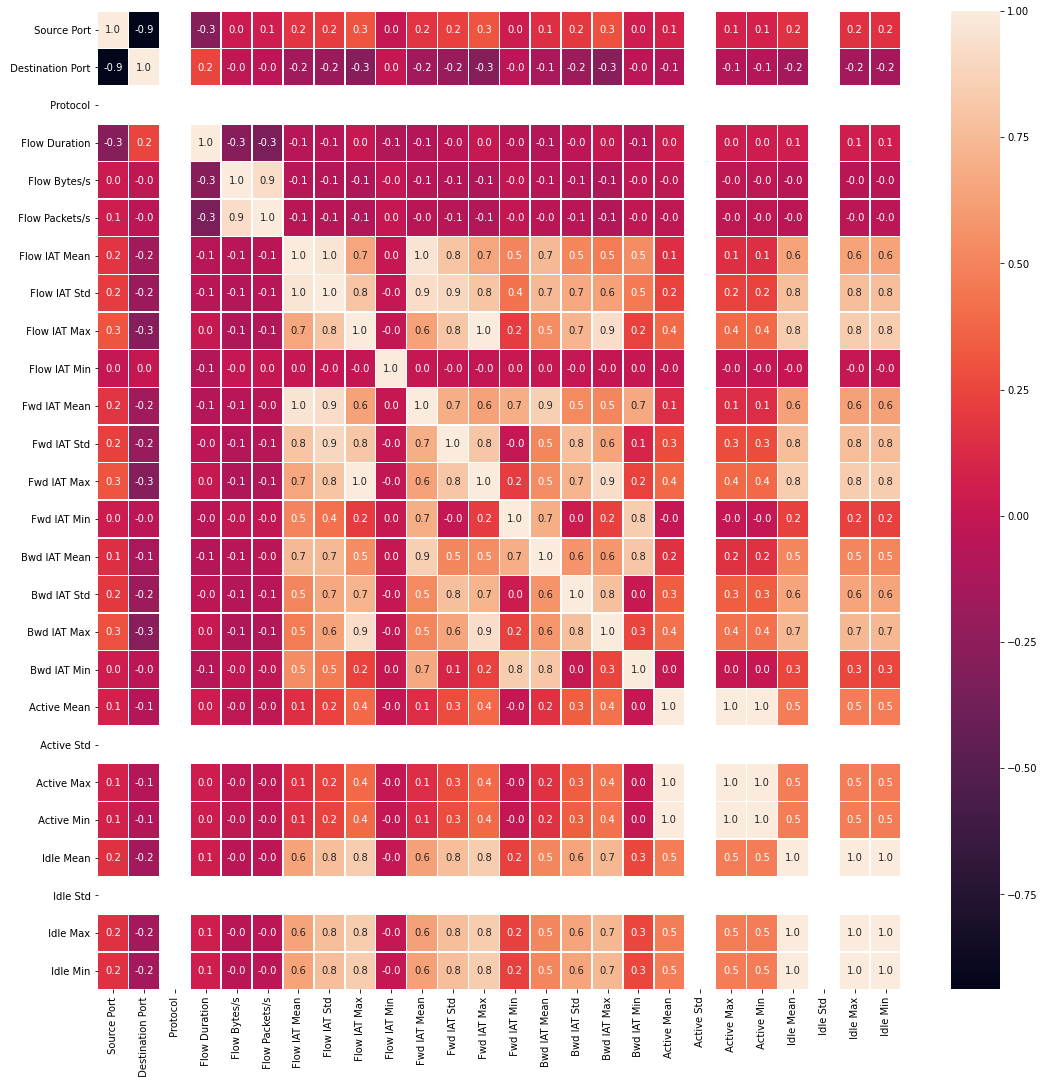

In [39]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(all_data_matrix.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [40]:
#So now we are creating a square matrix with dimensions equal to the number of features. In which we will have the elements as the absolute value of correlation between the features.
x=all_data_matrix.drop(columns="label")
y=all_data_matrix['label']
cor_matrix = x.corr().abs()
print(cor_matrix)

                    Source Port   Destination Port  ...   Idle Max   Idle Min
 Source Port           1.000000           0.938288  ...   0.160267   0.160267
 Destination Port      0.938288           1.000000  ...   0.150382   0.150382
 Protocol                   NaN                NaN  ...        NaN        NaN
 Flow Duration         0.282381           0.248873  ...   0.060608   0.060608
 Flow Bytes/s          0.025242           0.023178  ...   0.049656   0.049656
 Flow Packets/s        0.053518           0.043888  ...   0.042600   0.042600
 Flow IAT Mean         0.181326           0.163119  ...   0.639211   0.639211
 Flow IAT Std          0.212197           0.194627  ...   0.771956   0.771956
 Flow IAT Max          0.304814           0.279444  ...   0.835581   0.835581
 Flow IAT Min          0.000479           0.004516  ...   0.002889   0.002889
Fwd IAT Mean           0.173700           0.158631  ...   0.623737   0.623737
 Fwd IAT Std           0.220794           0.201897  ...   0.7683

Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. So we are selecting the upper traingular.

In [41]:
import numpy as np
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                    Source Port   Destination Port  ...   Idle Max   Idle Min
 Source Port                NaN           0.938288  ...   0.160267   0.160267
 Destination Port           NaN                NaN  ...   0.150382   0.150382
 Protocol                   NaN                NaN  ...        NaN        NaN
 Flow Duration              NaN                NaN  ...   0.060608   0.060608
 Flow Bytes/s               NaN                NaN  ...   0.049656   0.049656
 Flow Packets/s             NaN                NaN  ...   0.042600   0.042600
 Flow IAT Mean              NaN                NaN  ...   0.639211   0.639211
 Flow IAT Std               NaN                NaN  ...   0.771956   0.771956
 Flow IAT Max               NaN                NaN  ...   0.835581   0.835581
 Flow IAT Min               NaN                NaN  ...   0.002889   0.002889
Fwd IAT Mean                NaN                NaN  ...   0.623737   0.623737
 Fwd IAT Std                NaN                NaN  ...   0.7683

In [42]:
#we are selecting the columns which are having absolute correlation greater than 0.95 and making a list of those columns named 'to_drop'.

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)


[' Flow IAT Std', 'Fwd IAT Mean', ' Fwd IAT Max', ' Active Max', ' Active Min', ' Idle Max', ' Idle Min']


In [43]:
df1=x.drop(columns=to_drop)
df1.head(3)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Std,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Idle Mean,Idle Std
0,10.0.2.15,57188,82.161.239.177,110,6,7248168,2.112603e+04,29.110804,34515.085714,3897923,5,4.371676e+05,29,56614.039062,3.498551e+05,3898131,7,0,0,0,0
1,10.0.2.15,57188,82.161.239.177,110,6,5157723,1.052790e+03,3.683796,286540.166667,3743359,135,1.272066e+06,509,568901.666667,1.209110e+06,3743573,451,0,0,0,0
2,10.0.2.15,57188,82.161.239.177,110,6,41,1.324390e+07,48780.487805,41.000000,41,41,0.000000e+00,41,0.000000,0.000000e+00,0,0,0,0,0,0


In [44]:
pip install nmslib

In [47]:
import nmslib 
import numpy 
import sys 
import time 
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


#Data
dt = pd.read_csv("TimeBasedFeatures-10s-Layer2 (1).csv")
all_data_matrix=x
df = all_data_matrix.drop('Source IP', axis=1)
df['label']=dt['label']
df = df.drop(' Destination IP', axis=1)
print("all data matrix shape after")
print(all_data_matrix.shape)
# Encode label to numbers
le = preprocessing.LabelEncoder()
le.fit(df.label)
df['label'] = le.transform(df.label)
all_data_matrix = df.to_numpy()


(data_matrix_train, query_matrix) = train_test_split(all_data_matrix, test_size = 0.2)
print("train split is:")
print(data_matrix_train.shape)
print(query_matrix.shape)

# We are setting index parameters.
NN = 40 # neighbours 
efC = 100 #the depth of the search 
num_threads = 4
index_time_params = {'NN': NN, 'indexThreadQty': num_threads, 'efConstruction': efC}

#Initialising number of neighbours
K=100

# Space name should correspond to the space name
space_name='kldivgenfast'

# Intitialize the library, specify the space, the type of the vector and add data points
index = nmslib.init(method='sw-graph', space=space_name, data_type=nmslib.DataType.DENSE_VECTOR)
index.addDataPointBatch(data_matrix_train)


# Create an index
start = time.time()
index.createIndex(index_time_params)
end = time.time()
print('Index-time parameters', index_time_params)
print('Indexing time = %f' % (end-start))

# We are setting query-time parameters
efS = 1500
query_time_params = {'efSearch': efS}
print('Setting query-time parameters', query_time_params)
index.setQueryTimeParams(query_time_params)

# Querying
query_qty = query_matrix.shape[0]
start = time.time()
nbrs = index.knnQueryBatch(query_matrix, k = K, num_threads = num_threads)
end = time.time()
print('kNN time total=%f (sec), per query=%f (sec), per query adjusted for thread number=%f (sec)' %(end-start, float(end-start)/query_qty, num_threads*float(end-start)/query_qty))

# Computing gold-standard data
print('Computing gold-standard data')
start = time.time()
gs = []

query_qty = query_matrix.shape[0]
data_qty = data_matrix_train.shape[0]

for i in range(query_qty):
    q = query_matrix[i, :]
    d = numpy.log(data_matrix_train * (1.0 / q))
    dist_vals = numpy.sum(data_matrix_train * d, axis=1)
    tmp = [(dist_vals[i], i) for i in range(data_qty)]
    tmp.sort()
    gs.append([tmp[i][1] for i in range(K)])

end = time.time()

print('brute-force kNN time total=%f (sec), per query=%f (sec)' %(end - start, float(end - start) / query_qty))


# Finally computing recall
recall=0.0
for i in range(0, query_qty):
  correct_set = set(gs[i])
  ret_set = set(nbrs[i][0])
  recall = recall + float(len(correct_set.intersection(ret_set))) / len(correct_set)
recall = recall / query_qty
print('kNN recall %f' % recall)

# Save a meta index and the data
index.saveIndex('dense_index_kldiv.txt', save_data=True)

# Re-intitialize the library, specify the space, the type of the vector.
newIndex = nmslib.init(method='sw-graph', space=space_name, data_type=nmslib.DataType.DENSE_VECTOR)

# Re-load the index and the data
newIndex.loadIndex('dense_index_kldiv.txt', load_data=True)

# Setting query-time parameters and querying
print('Setting query-time parameters', query_time_params)
newIndex.setQueryTimeParams(query_time_params)

K = 500000000
query_qty = query_matrix.shape[0]
start = time.time()
new_nbrs = newIndex.knnQueryBatch(query_matrix, k = K, num_threads = 1)
end = time.time()
print('kNN time total=%f (sec), per query=%f (sec), per query adjusted for thread number=%f (sec)' 
      %(end-start, float(end-start)/query_qty, num_threads*float(end-start)/query_qty))

# Finally computing recall
recall=0.0
for i in range(0, query_qty):
    correct_set = set(gs[i])
    ret_set = set(new_nbrs[i][0])
    recall = recall + float(len(correct_set.intersection(ret_set))) / len(correct_set)
recall = recall / query_qty
print()
print('Final Value of Recall : %f' % recall)
print("DONE")

all data matrix shape after
(8044, 28)
train split is:
(6435, 27)
(1609, 27)
Index-time parameters {'NN': 40, 'indexThreadQty': 4, 'efConstruction': 100}
Indexing time = 0.598721
Setting query-time parameters {'efSearch': 1500}
kNN time total=1.849647 (sec), per query=0.001150 (sec), per query adjusted for thread number=0.004598 (sec)
Computing gold-standard data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in multiply


brute-force kNN time total=11.649386 (sec), per query=0.007240 (sec)
kNN recall 0.018266
Setting query-time parameters {'efSearch': 1500}
kNN time total=2.949983 (sec), per query=0.001833 (sec), per query adjusted for thread number=0.007334 (sec)

Final Value of Recall : 0.945612
DONE
